## Example code to test MV theory

In [1]:
import numpy as np
import pandas as pd
import cvxpy as cp
import math
import MVPLibrary as mv
import importlib as imp
import matplotlib.pyplot as plt #for plotting purposes

%matplotlib inline

In [2]:
data = pd.read_csv('Data/Asset_Regime.csv')

In [3]:
data.head(10)

,Unnamed: 0,US Equities,World Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities,Unnamed: 8,Regime
0,Jan-85,0.081301,0.028511,0.031500,0.037908,0.048963,0.056605,0.021351,NaN,1
1,Feb-85,0.030075,-0.009204,-0.044692,0.012689,-0.042029,0.016448,-0.015217,NaN,1
2,Mar-85,-0.007299,0.075134,0.028719,0.004323,0.032666,-0.006716,0.037171,NaN,1
3,Apr-85,-0.012255,-0.002459,0.023084,0.018215,0.037125,0.000906,-0.035116,NaN,1
4,May-85,0.064516,0.040245,0.086780,0.042363,0.104199,0.027241,0.004351,NaN,1
5,Jun-85,0.020979,0.022419,0.014284,0.012712,0.012482,0.023207,-0.046275,NaN,1
6,Jul-85,0.004566,0.048480,-0.014958,0.008399,-0.006449,0.009221,-0.006240,NaN,1
7,Aug-85,-0.009091,0.027709,0.021934,0.020119,0.037397,-0.054684,0.014064,NaN,1
8,Sep-85,-0.027523,0.048713,0.002172,0.009599,0.000941,-0.031145,0.060092,NaN,1
9,Oct-85,0.037736,0.058439,0.033903,0.002563,0.037840,0.031415,0.075345,NaN,1


In [4]:
del data['Unnamed: 8']
data.rename(str, columns={'Unnamed: 0': 'Date'}, inplace=True)

In [5]:
data.set_index('Date', inplace=True)

In [6]:
data.head(10)

,US Equities,World Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities,Regime
Date,,,,,,,,
Jan-85,0.081301,0.028511,0.031500,0.037908,0.048963,0.056605,0.021351,1
Feb-85,0.030075,-0.009204,-0.044692,0.012689,-0.042029,0.016448,-0.015217,1
Mar-85,-0.007299,0.075134,0.028719,0.004323,0.032666,-0.006716,0.037171,1
Apr-85,-0.012255,-0.002459,0.023084,0.018215,0.037125,0.000906,-0.035116,1
May-85,0.064516,0.040245,0.086780,0.042363,0.104199,0.027241,0.004351,1
Jun-85,0.020979,0.022419,0.014284,0.012712,0.012482,0.023207,-0.046275,1
Jul-85,0.004566,0.048480,-0.014958,0.008399,-0.006449,0.009221,-0.006240,1
Aug-85,-0.009091,0.027709,0.021934,0.020119,0.037397,-0.054684,0.014064,1
Sep-85,-0.027523,0.048713,0.002172,0.009599,0.000941,-0.031145,0.060092,1


In [7]:
listOfAssets = ['US Equities', 'World Equities', 'US Treasuries',
                'High Yield', 'Corp Bonds', 'Real Estate', 'Commodities']

## Part 2: Calculate the historical Mean and Covariance of the Assets, then create a sample data set using the means and covariances

### I call the simulated data set dataSimulated

In [8]:
#Calculate the Monthly Mean
means = pd.DataFrame(data[listOfAssets].mean()).transpose()
means

,US Equities,World Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities
0,0.009992,0.008464,0.007329,0.007414,0.007439,0.008817,0.005052


In [9]:
#Calculate the Covariance Matrix
covar = data[listOfAssets].cov()
covar

,US Equities,World Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities
US Equities,0.002022,0.001613,-0.000128,0.000665,0.000199,0.001523,0.000671
World Equities,0.001613,0.002503,-0.000125,0.000633,0.000214,0.001366,0.000962
US Treasuries,-0.000128,-0.000125,0.000913,-0.000002,0.000407,0.000050,-0.000301
High Yield,0.000665,0.000633,-0.000002,0.000571,0.000215,0.000797,0.000307
Corp Bonds,0.000199,0.000214,0.000407,0.000215,0.000351,0.000300,0.000059
Real Estate,0.001523,0.001366,0.000050,0.000797,0.000300,0.003000,0.000521
Commodities,0.000671,0.000962,-0.000301,0.000307,0.000059,0.000521,0.003454


## Calculate mean variance weights

### The orange line calculates the sharpe optimal point, and draws the Capital Market Line
### The Capital Market Line is the line between the following 2 points.  The first in the point (x,y) = (0, the risk free rate) and (x,y) = (volatility of sharpe ratio optimal point, expected return of the sharp ratio optimal point)

### Note, the CML line is tangent to the efficient frontier, and importantly, the CML line extends to the right if you allow for shorting

In [10]:
imp.reload(mv)
riskFreeRate = .006
dfEF, optimalWeights = mv.calc_efficient_frontier(means, covar, 
                                                                   riskFreeRate, 
                                                                   nPoints = 1000)

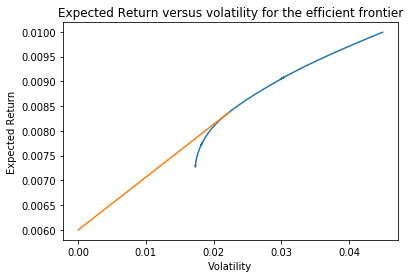

In [11]:
sharpOptimalValues = pd.DataFrame(dfEF.loc[dfEF['Sharp Ratio'].idxmax()])
sharpOptimalValues = sharpOptimalValues.transpose()
intercept = pd.DataFrame(pd.Series([riskFreeRate, 0, None]))
intercept = intercept.transpose()
intercept.columns = dfEF.columns
sharpOptimalValues = sharpOptimalValues.append(intercept)
plt.plot(dfEF['Volatility'], dfEF['Expected Return'])
plt.plot(sharpOptimalValues['Volatility'], sharpOptimalValues['Expected Return'])
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Expected Return versus volatility for the efficient frontier')
plt.show()

In [12]:
optimalWeights

,US Equities,World Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities
0,7.785280e-22,2.993659e-22,0.107735,0.288649,0.542373,1.833347e-21,0.061243
